~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'float'> <class 'float'> 50.0 -50.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'float'> <class 'float'> 49.0 -49.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'float'> <class 'float'> 48.0 -48.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'float'> <class 'float'> 47.0 -47.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'float'> <class 'float'> 46.0 -46.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'float'> <class 'float'> 45.0 -45.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'float'> <class 'float'> 44.0 -44.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'float'> <class 'float'> 43.0 -43.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'float'> <class 'float'> 42.0 -42.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'float'> <class 'float'> 41.0 -41.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'float'> <class 'float'> 40.0 -40.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'float'> <class 

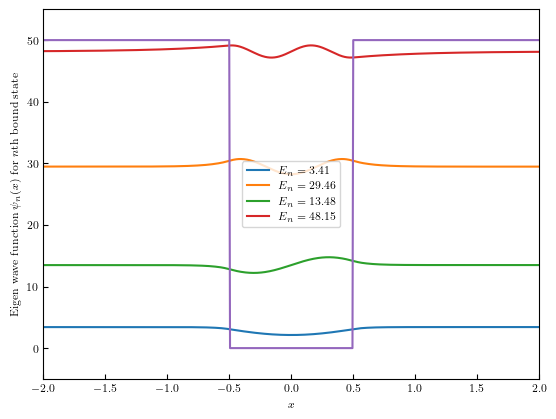

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from local_util import gen_H

0.1 3001
(164.49344321455578+2.1593301399973722e-15j) --------------- 3001 0.1
bound states eigenergy is:  [1.40355086-6.93584968e-12j 3.3539152 +1.62357619e-12j]


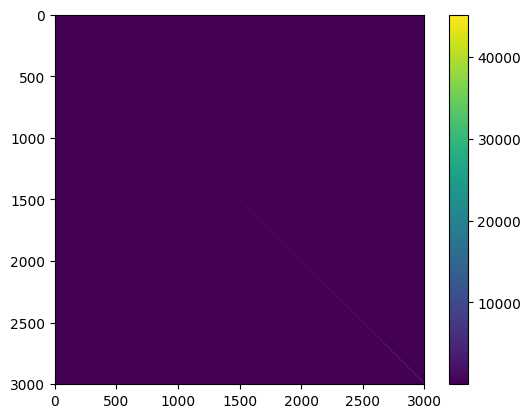

In [52]:

def kinetic(N, w):
    print(w, N)
    return np.diag([(n*w)**2 / 2 for n in range(N)]) + 0j


def V_k(V, N, w):
    T = 2*np.pi/w
    x = np.linspace(0, T, N, endpoint=False)
    Vx = V(x)
    Vw = np.fft.fft(Vx)*T/N / T
    res = np.zeros((N, N), dtype=np.complex128)
    print(Vw[0], '---------------', N, w)
    for i in range(N):
        print('========', i, '\r', end='')
        res += np.diag([Vw[i]]*(N-i), i)
        if i > 0:
            res += np.diag([Vw[i]]*(N-i), -i).conjugate()
    return res


w0 = 1
N = 3001
w = .1
T = 2*np.pi/w
def V(x, w0=w0, T=T):
    return (w0*(x- T/2))**2 / 2

# print(kinetic(N, w))
H_fin = kinetic(N, w) + V_k(V, N, w)
# H_fin1 = gen_H(V, 2*N-1, w, verbose=1)
plt.imshow(np.real(H_fin))
plt.colorbar()
val, vec = np.linalg.eig(H_fin)
idx = np.argwhere(val < 5).T[0]
print('bound states eigenergy is: ', val[idx])



In [51]:
l = 5
print(H_fin[0, l])
# print(H_fin1[l, l])
print(quad(V, 0, T, weight='cos', wvar=l*w)[0]/T)
print()

(3.6711593422928956+62.831279263041125j)
3.9999999999999334



In [41]:
N = 301
w = .1
T = 2*np.pi / w

func = lambda x: x**2/2
print('omega=', w)
print(quad(func, 0, T, weight='cos', wvar=1*w)[0]/T)

x = np.linspace(0, T, N, endpoint=False)
f = func(x)
(np.fft.fft(f)*T/N)[0]/T

omega= 0.1
99.9999999999999


(654.6983195610096+0j)

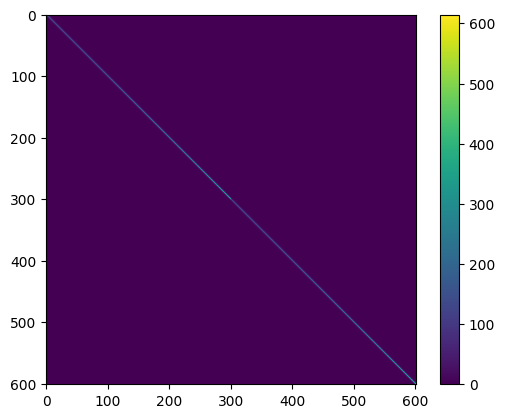

In [8]:
plt.imshow(np.abs(H_fin1))
plt.colorbar()

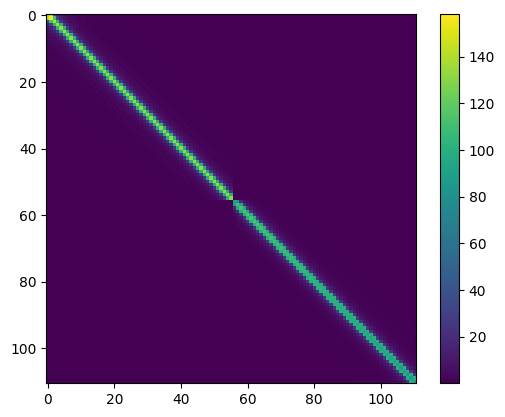

In [11]:
plt.imshow(np.abs(H_fin1-np.real(H_fin)))
plt.colorbar()

In [28]:
N = 10000
T = 10*np.pi
w = 2*np.pi/T
func = lambda x: np.exp(-x**2)
print('omega=', w)
print(quad(func, 0, T, weight='cos', wvar=10*w))

x = np.linspace(0, T, N, endpoint=False)
f = func(x)
(np.fft.fft(f)*T/N)[10]

omega= 0.2
(0.32602466608664615, 8.31335454897046e-09)


(0.327595462413441-0.5380778619759957j)

In [34]:
np.diag([1]*3, -1)

array([[0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]])

In [44]:
np.array([[1j, 2j],
          [1, 2]]).conjugate()

array([[0.-1.j, 0.-2.j],
       [1.-0.j, 2.-0.j]])

bound states eigenergy is:  [ 3.41448126 29.45976792 13.47937265 48.1516352 ]
check normalization:  1.0
check normalization:  1.0
check normalization:  1.0
check normalization:  1.0000000000000002


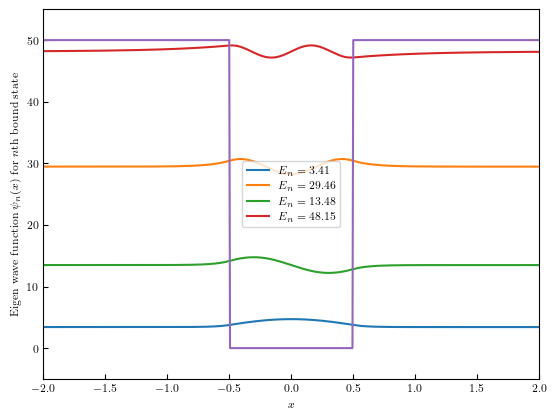

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from local_util import prettify_plot, basis, gen_H

a = 1
V0 = 50
def V(x, V0=V0, a=a):
    return np.sign(np.abs(x) - a/2) * (V0/2) + V0/2



N = 101
w = 1
T = 2*np.pi/w
H = np.zeros((N, N))
H_fin = gen_H(lambda x: V(x), N, w, points=[-a/2, a/2], verbose=1)
val, vec = np.linalg.eig(H_fin)
idx = np.argwhere(val < 50).T[0]
print('bound states eigenergy is: ', val[idx])

prettify_plot()
x = np.linspace(-T/2, T/2, 1000)
psi = np.zeros([idx.size, x.size])
for i in range(N):
    for j in range(idx.size):
        psi[j] += np.array([vec[i, idx[j]] * basis(xi, i, N, w) for xi in x])
for j in range(idx.size):
    print('check normalization: ', np.trapz(psi[j]**2, x))
    plt.plot(x, psi[j] + val[idx[j]],
             label=r'$E_n='+f'{val[idx[j]]:.2f}'+r'$')

plt.plot(x, V(x))
plt.xlabel(r'$x$')
plt.ylabel(r'Eigen wave function $\psi_n(x)$ for $n$th bound state')
plt.xlim(-2, 2)
plt.ylim(-5, 55)
plt.legend()
plt.show()
# [ 3.41357099 13.47572274 29.45230759 48.14346422]

In [71]:
# val, vec = np.linalg.eig(H_fin)
# idx = np.argwhere(val < 50).T[0]
np.sum(vec[:, idx[0]]**2)
# vec[:, idx[0]]**2

0.9999999999999999

bound states eigenergy is:  [49.99999999]
check normalization:  3.000000000363025


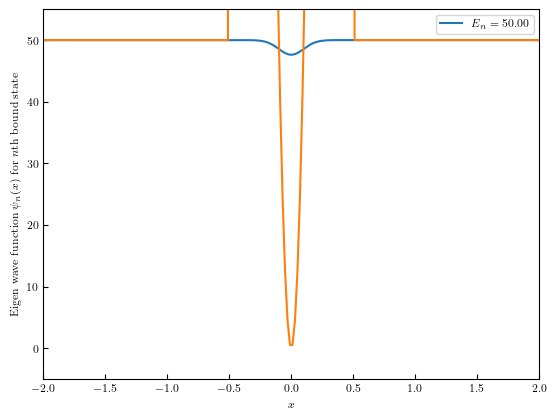

In [61]:


import numpy as np
import matplotlib.pyplot as plt
from local_util import prettify_plot, basis, gen_H

a = 1
V0 = 50


def V(x, V0=V0, a=a):
    return np.sign(np.abs(x) - a/2) * (V0/2) + V0/2 + (100*x)**2/2*(np.abs(x)<a/2)



N = 101
w = 1
H = np.zeros((N, N))
H_fin = gen_H(lambda x: V(x), N, w, points=[-a/2, a/2], verbose=1)
val, vec = np.linalg.eig(H_fin)
idx = np.argwhere(val < 50).T[0]
print('bound states eigenergy is: ', val[idx])

prettify_plot()
x = np.linspace(-10, 10, 1000)
psi = np.zeros([idx.size, x.size])
for i in range(N):
    for j in range(idx.size):
        psi[j] += np.array([vec[i, idx[j]] * basis(xi, i, N, w) for xi in x])
for j in range(idx.size):
    print('check normalization: ', np.trapz(psi[j]**2, x))
    plt.plot(x, psi[j] + val[idx[j]],
             label=r'$E_n='+f'{val[idx[j]]:.2f}'+r'$')

plt.plot(x, V(x))
plt.xlabel(r'$x$')
plt.ylabel(r'Eigen wave function $\psi_n(x)$ for $n$th bound state')
plt.xlim(-2, 2)
plt.ylim(-5, 55)
plt.legend()
plt.show()
# [ 3.41357099 13.47572274 29.45230759 48.14346422]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


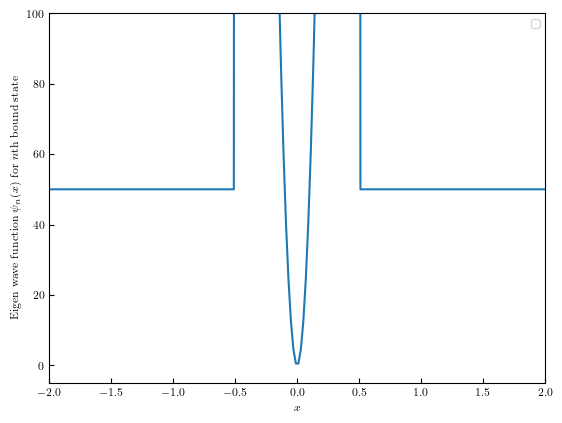

In [62]:
plt.plot(x, V(x))
plt.xlabel(r'$x$')
plt.ylabel(r'Eigen wave function $\psi_n(x)$ for $n$th bound state')
plt.xlim(-2, 2)
plt.ylim(-5, 100)
plt.legend()
plt.show()

bound states eigenergy is:  [0.5        2.50000004 4.5000062  1.5        3.50000057]
check normalization:  0.9999999999999388
check normalization:  0.9999999999317299
check normalization:  0.9999999896056877
check normalization:  0.9999999999969175
check normalization:  0.9999999989549507


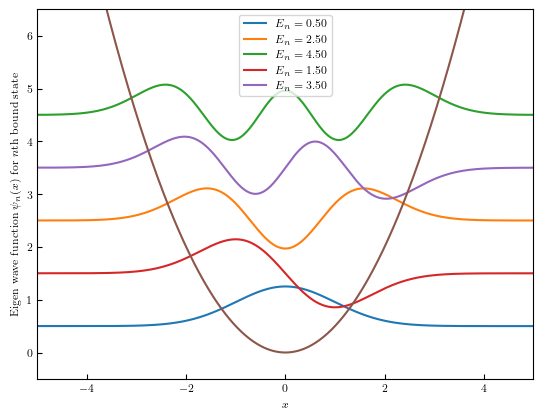

1.0


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from local_util import prettify_plot, basis, gen_H


def V(x, w0):
    return (w0*x)**2 / 2


w0 = 1
N = 101
w = .1
H = np.zeros((N, N))
H_fin = gen_H(lambda x: V(x, w0), N, w, verbose=1)
val, vec = np.linalg.eig(H_fin)
idx = np.argwhere(val < 5).T[0]
print('bound states eigenergy is: ', val[idx])

prettify_plot()
x = np.linspace(-10, 10, 1000)
psi = np.zeros([idx.size, x.size])
for i in range(N):
    for j in range(idx.size):
        psi[j] += np.array([vec[i, idx[j]] * basis(xi, i, N, w) for xi in x])
for j in range(idx.size):
    print('check normalization: ', np.trapz(psi[j]**2, x))
    plt.plot(x, psi[j] + val[idx[j]],
             label=r'$E_n='+f'{val[idx[j]]:.2f}'+r'$')

plt.plot(x, V(x, w0))
plt.xlabel(r'$x$')
plt.ylabel(r'Eigen wave function $\psi_n(x)$ for $n$th bound state')
plt.xlim(-5, 5)
plt.ylim(-.5, 6.5)
plt.legend()
plt.show()
print(np.sum(vec[:, idx[1]]**2))

In [3]:
np.sign(-5)

-1

In [4]:
a = np.array([1, 2, 3])
b = np.array([[1], [2], [3]])
a@b

array([14])

In [5]:
b@a

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)